In [1]:
library(data.table)
library(ggplot2)
library(latex2exp)


In [2]:
time <- 200

In [49]:
N_AGENTS <- 12625

In [50]:
mypath <- "../../log/ProvaURV-3.5-0.5"

In [107]:
mypath <- "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5"

In [108]:
list.dirs <- function(path=".", pattern=NULL, all.dirs=FALSE,
  full.names=FALSE, ignore.case=FALSE) {
  # use full.names=TRUE to pass to file.info
  all <- list.files(path, pattern, all.dirs,
           full.names=TRUE, recursive=FALSE, ignore.case)
  dirs <- all[file.info(all)$isdir]
  # determine whether to return full names or just dir names
  if(isTRUE(full.names))
    return(dirs)
  else
    return(basename(dirs))
}

In [109]:
thepath = list.dirs(mypath)[1]

In [110]:
filename = paste(mypath, '/', thepath, '/', 'k_core.csv', sep = "")

In [111]:
DF <- read.csv(file = filename, skip=12)

In [112]:
tempDF <- DF[DF$state =='i',]
tempDF <- tempDF[tempDF$time == 1,]

In [113]:
tempDF

,time,agent,k.core,state,degree
1600,1,1599,2,i,2


In [114]:
agent <- as.integer(tempDF['agent'])
kcore <- as.integer(tempDF['k.core'])

In [115]:
DF$'agent.init' <- agent
DF$'k.core.init' <- kcore
DF$'density' <- 1

In [116]:
DT <- data.table(DF)

In [117]:
DT1 = DT[, sum(density), by=list(time, state)]

In [118]:
names(DT1)[names(DT1)=="V1"] <- "density"

In [119]:
DT1$density <- DT1$density / 12625

In [120]:
DT1$'agent.init' <- agent
DT1$'k.core.init' <- kcore

In [121]:
tempDT1 <- DT1[DT1$state == 'r']
tempDT1 <- tempDT1[tempDT1$time == 200]
density <- as.numeric(tempDT1[,'density'])

In [122]:
DT1 = DT1[DT1$state == 'r']
DT1[,state:=NULL]

## All datasets

Assemble everything and do the loops

In [196]:
emptytable <- data.table()
lista = list.dirs(mypath)
for (i in lista){    
    filename = paste(mypath, '/', i, '/', 'k_core.csv', sep = "")
    print(filename)
    DF <- read.csv(file = filename, skip=12)
    tempDF <- DF[DF$state =='i',]
    tempDF <- tempDF[tempDF$time == 1,]

    agent <- as.integer(tempDF['agent'])
    kcore <- as.integer(tempDF['k.core'])

    DF$'agent.init' <- agent
    DF$'k.core.init' <- kcore
    DF$'density' <- 1
    DF$'density.mean' <- 1
    DF$'density.std' <- 1

    DT <- data.table(DF)
    DT1 = DT[, sum(density), by=list(time, state)]
    
    names(DT1)[names(DT1)=="V1"] <- "density"

    DT1$density <- DT1$density / N_AGENTS

    DT1$'agent.init' <- agent
    DT1$'k.core.init' <- kcore
    
    tempDT1 <- DT1[DT1$state == 'r']
    tempDT1 <- tempDT1[tempDT1$time == 200]
    density <- as.numeric(tempDT1[,'density'])
    
    DT1 = DT1[DT1$state == 'r']
    DT1[,state:=NULL]
    #print(DT1)
    emptytable <- rbind(emptytable, DT1)
}

[1] "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5/2019_27_02_12_58_46/k_core.csv"
[1] "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5/2019_27_02_12_58_55/k_core.csv"
[1] "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5/2019_27_02_12_59_12/k_core.csv"
[1] "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5/2019_27_02_12_59_19/k_core.csv"
[1] "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5/2019_27_02_13_19_42/k_core.csv"
[1] "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5/2019_27_02_13_19_51/k_core.csv"
[1] "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5/2019_27_02_13_19_56/k_core.csv"
[1] "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5/2019_27_02_13_20_05/k_core.csv"
[1] "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5/2019_27_02_13_38_12/k_core.csv"
[1] "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5/2019_27_02_13_40_29/k_core.csv"
[1] "/home/nik/ProvaEmailcontacts2.5/ProvaEmailcontacts2.5/2019_27_02_13_40_31/k_core.csv"

In [197]:
rawtable <- emptytable

Compute mean and standard deviation and add to data table

In [204]:
emptytable <- rawtable

In [205]:
emptytabletime <- emptytable[emptytable$time == 200]
#emptytabletime <- emptytabletime[emptytabletime$density < 0.04]
emptytabletime <- emptytabletime[emptytabletime$density > 0.005]
emptytabletime$k.core.init <- emptytabletime$k.core.init + 1 + emptytabletime$k.core.init %% 2 
toplot <- emptytabletime[, mean(density), by=list(time, k.core.init)][,'k.core.init']
toplot$mean <- emptytabletime[emptytabletime$time == 200][, mean(density), by=list(time, k.core.init)][,'V1']
toplot$std <- emptytabletime[emptytabletime$time == 200][, sd(density), by=list(time, k.core.init)][,'V1']

Clean NaN values

In [206]:
toplot[is.na(toplot)] <- 0

In [207]:
toplot

k.core.init,mean,std
3,0.0317029702970,0.00471247795407
5,0.0328347296268,0.00539085557234
7,0.0323655750190,0.00639850474818
9,0.0342376237624,0.00365889234670
11,0.0343031226200,0.00346218983630
13,0.0349063214014,0.00429325741132
15,0.0346226622662,0.00453140000793
17,0.0342970297030,0.00296822181161
19,0.0303762376238,0.00216678668677
25,0.0329702970297,0.00758506315210


Plot

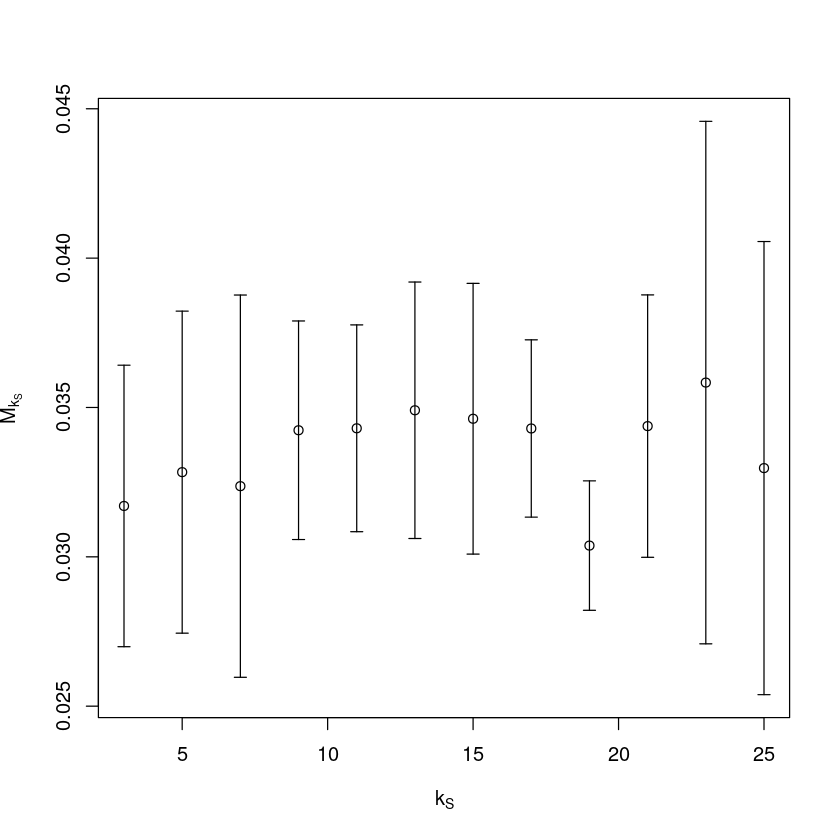

In [208]:
plot(toplot$k.core.init, toplot$mean,
    ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     #log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)


Log y plot

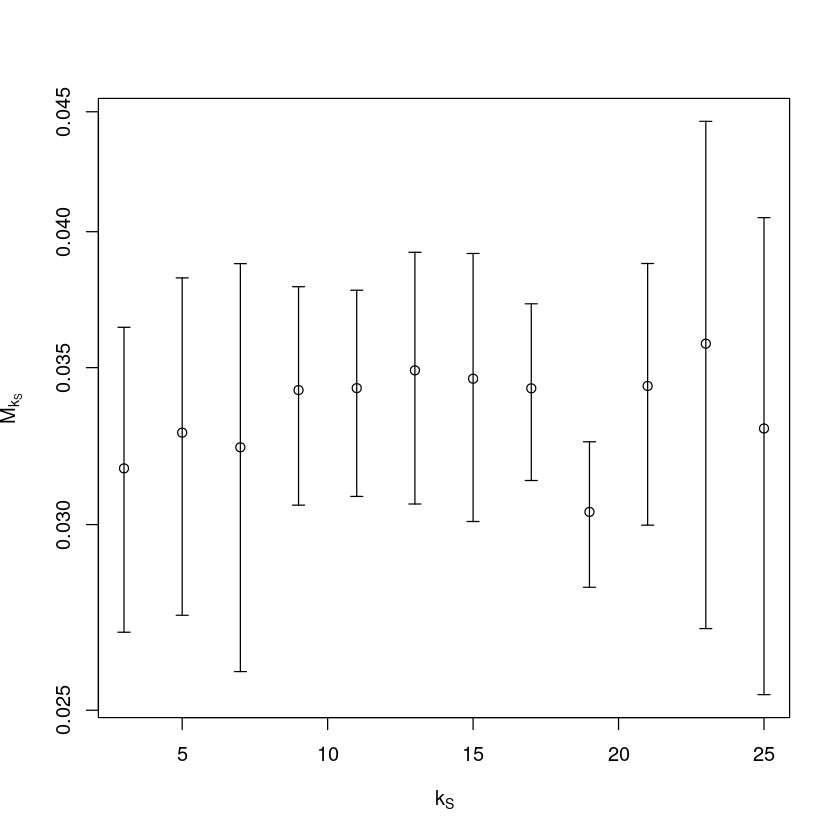

In [209]:
plot(toplot$k.core.init, toplot$mean,
     ylim=range(c(toplot$mean-toplot$std, toplot$mean+toplot$std)),
     log='y',
     xlab=TeX('$k_S$'), ylab=TeX('$M_{k_S}$'),
    #main="Scatter plot with std.dev error bars"
)
arrows(toplot$k.core.init, toplot$mean-toplot$std, 
       toplot$k.core.init, toplot$mean+toplot$std, length=0.05, angle=90, code=3)